In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

K-means

In the foundational k-means algorithm, initial centroids are typically selected at random from the data points. Because of this random initialisation, the clusters generated can differ across multiple runs. 
The centroid of a cluster is generally calculated as the mean of all the points within that cluster. The notion of 'closeness' or similarity between points is determined using metrics like the Euclidean distance (but that require numerical values), cosine similarity, correlation, among others. 

-        Partitional clustering approach
-        Number of clusters, K, must be specified
-        Each cluster is associated with a centroid (center point)
-        Each point is assigned to the cluster with the closest centroid
-        The basic algorithm is very simple

SSE—> For every data point in a cluster, the error is the distance between the point and the representative (or center) of that cluster. 
With more clusters, points will be, on average, closer to a centroid. 

However, this doesn't necessarily mean that a high K value produces good clustering. As the text suggests, a good clustering with a smaller K might have a lower SSE than a suboptimal clustering with a higher K value. 

It's essential to understand that SSE doesn't inform us about the distances between distinct clusters; instead, it measures the compactness of points within individual clusters 

The goal is to achieve a low SSE with a smaller k:

- Start with the minimum, k=2
- For each (beginning at 2), run the k-means algorithm multiple times on the data.
- For every run, record the resulting SSE.
- Plot the minimum (or best) SSE value for that k.
- Repeat the process by incrementing k (e.g., k=3, 4…).
- Generally, there's no need to use a large k, especially if the dataset is well-suited for centroid-based clustering.


Bisecting k-means

Combining the principles of hierarchical clustering with the k-means algorithm. 

 -  Initialization: Begin with the entire dataset treated as a single cluster
- Bisecting Process: At each iteration, select a cluster to split, only one. The selection is based on a criterion, such as the cluster having the highest Sum of Squared Errors (SSE). Once a cluster is chosen, apply the k-means algorithm with k=2 to divide this cluster into two sub-clusters.
-  Repetition: Continue the process of selecting and bisecting clusters until the desired number of clusters is achieved.


X-means

While in traditional K-Means the number of clusters k must be specified at the start, X-Means tries to determine the optimal value of k automatically.

The BIC evaluates the trade-off (compromesso) between the fit (adattamento) of the model to the data and its complexity. 

For the algorithm using BIC:
- Improve Parameters: Execute K-Means using the current value of k.
- Improve Structure: Recursively divide each cluster into two (via Bisecting 2-Means). Use the local BIC to determine whether to retain the split. Stop if the current structure violates the local BIC or if the number of clusters exceeds rmax.
- Save Configuration: Store the current configuration and compute the global BIC for the entire structure.
- If k>rmax halt and return the model that best aligns with the global BIC.


Hierarchical Clustering

Two types:

- Agglomerative (bottom-up): Start with the points as individual clusters. At each step, merge the closest pair of clusters until only one cluster (or k clusters) left.
- Divisive (top-down): Start with one, all-inclusive cluster. At each step, split a cluster until each cluster contains an individual point (or there are k clusters)

Algorithm:
- Compute the proximity matrix
- Let each data point be a cluster
- Repeat
- Merge the two closest clusters
- Update the proximity matrix
- Until only a single cluster remains

We can define the two closest clusters with 5 possibilities:
- Min function: that the distance between two clusters is the minimum of the distance between their points 
- MAX function: I consider the maximum distance between two points in the clusters. This is best for well-separated clusters. 
- Group average: I consider all distances between points in the two clusters and consider the group average, this is the average of the distance. 
- Distance between Centroids: I compute the average of the two clusters and consider the distance between the two averages (centroids) as the distance between two clusters.
- Ward’s Method: the distance is treated as a variable. Among various algorithms, Ward’s Method stands out as it computes based on the sum of squared errors (SSE). Specifically, two clusters are merged if their combination yields the greatest improvement in SSE. 


Density-based Clustering

 
DBSCAN is a density-based algorithm:
- Density = number of points within a specified radius (Eps)
- A point is a core point if it has at least a specified number of points (MinPts) within Eps 
         - These are points that are at the interior of a cluster
             - Counts the point itself
- A border point is not a core point but is in the neighborhood of a core point. They are close to a dense area; they live in a border from a dense area and a non-dense area. 
- A noise point is any point that is not a core point or a border point 
 
Algorithm:
- eliminate noise points
- perform density-based clustering on the remaining points by introducing a clustering label, that is a number, and consider the all-core points in an arbitrary way and for all point we repeat this part. First, if the core point has not yet a cluster label, then we create a new cluster label-color, so we consider a new point. Then we consider all the points in the neighbored and if the points in the neighbored don’t have a color they get the color of the core point that we are considering. Then we repeat for another core point, it doesn’t matter if it hasn’t yet a color or it has, in the first case we create a new cluster. It is deterministic. 

- EPS (epsilon): the radius within which points are considered neighbors.
- MinPts (Minimum Points): the minimum number of points required to form a dense region, i.e., a cluster.
 
Selecting appropriate values for EPS and MinPts is crucial for the outcome of clustering with DBSCAN. To determine a suitable value for EPS, it's common to plot a graph of the distance from each point to its k-th nearest neighbor, arranged in ascending order. This is known as the k-nearest neighbors (k-NN) distance plot. The point on the k-NN plot where the curve ascends most sharply can be a good candidate for EPS, as it indicates where the density of points drops off.

Generally, MinPts can initially be set to a value corresponding to the number of dataset dimensions plus one or two, but the best practice involves trying various combinations and assessing the resulting clustering quality using cluster validity metrics or domain knowledge.

OPTICS

The OPTICS algorithm requires two parameters:
 
- ε (epsilon), which specifies the maximum radius to consider for neighborhood.
- MinPts, which defines the minimum number of points required to form a dense region, or a cluster.
 
- Core Point: A point p is considered a core point if there are at least MinPts within its ε-neighborhood.
- Core Distance: This is defined as the smallest radius that must include MinPts to consider a point a core point. If a point is not a core point, its core distance is undefined.

The algorithm introduces a new measure called the reachability distance, which is the maximum of the core distance and the actual distance between two points. It is defined as the maximum between the core distance of point p and the actual distance between points p and q.  

HDBSCAN

HDBSCAN extends DBSCAN by converting it into a hierarchical clustering algorithm, but it also extracts a flat clustering. HDBSCAN bypass the choice of the Eps parameter and scans all possible solution with all values of Eps.




In [107]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score
#import dataset
from sklearn.datasets import load_iris

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [108]:
df = pd.read_csv("dataset_prepared.csv")

In [109]:
mode_order_mapping = {True: 1, False: 0}
df['explicit'] = df['explicit'].map(mode_order_mapping).astype('Int64')

In [110]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

name          object
artists       object
album_name    object
genre         object
dtype: object

In [111]:
df_train = df.drop(['name', 'artists', 'album_name', 'genre'], axis=1)
df_train = df_train.drop(["key","time_signature", "mode", "explicit"], axis=1)

In [112]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(df_train)
type(df_train)

pandas.core.frame.DataFrame

# K-means

In [113]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [115]:

sse_list = []
sil_list = []

for k in range(2, 51):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse_list.append(kmeans.inertia_)
    sil_list.append(silhouette_score(train_data, kmeans.labels_))

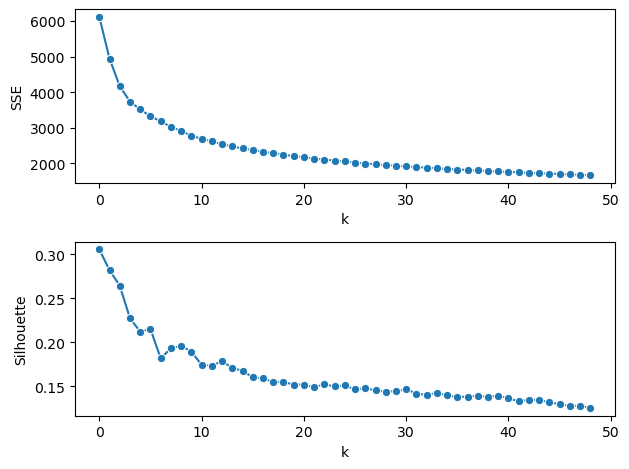

In [116]:
fig, axs = plt.subplots(2) # 1 row, 2 columns
 
sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')
sns.lineplot(x=range(len(sil_list)), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')
 
plt.tight_layout() # Adjust the padding between and around subplots
# k= 4 5 6 7

In [165]:
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10, max_iter=100)
kmeans.fit(train_data)

KMeans(max_iter=100, n_clusters=6, n_init=10)

#per assegnare ai 4 clusters delle lettere anzi che dei numeri
df['kmeans_labels'] = kmeans.labels_
df['kmeans_labels'] = df['kmeans_labels'].map({0:"A", 1: "B", 2: "C", 3:"D"})

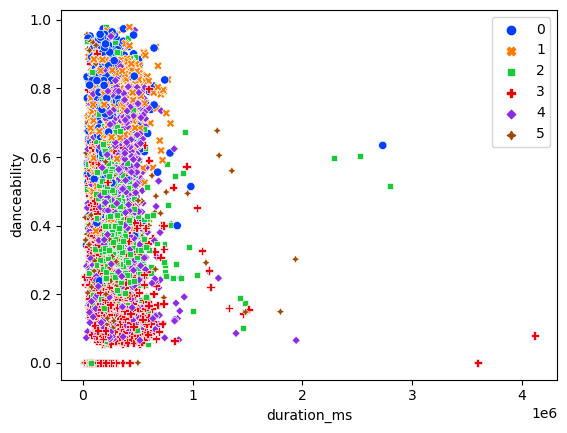

In [166]:
sns.scatterplot(data=df_train, 
                x="duration_ms",
                y="danceability",
                hue=kmeans.labels_,
                style=kmeans.labels_,
                palette="bright")          
plt.show()

Hierarchical clustering

In [169]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [177]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=10, n_clusters=None, affinity='euclidean', linkage='ward')
model = model.fit(train_data)

/Users/francescocapria/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


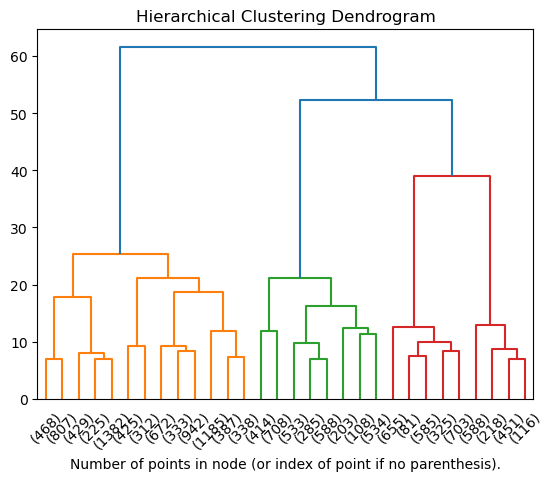

In [178]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [179]:
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
hier.fit(train_data)

/Users/francescocapria/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [ ]:
sns.scatterplot(data=df_train:, x="AgeFill", y="Fare", hue=hier.labels_, 
                style=hier.labels_, palette="bright")
plt.show()